# PENDAHULUAN

Tugas ini membahas untuk kasus customer clustering. Di sini saya mengelompokkan nasabah kartu kredit berdasarkan cara mereka memakai kartu, seperti saldo, jumlah dan frekuensi belanja, penggunaan cash advance, dan pola pembayaran. Dari hasil cluster ini saya ingin melihat kelompok nasabah yang berbeda, misalnya pengguna ringan dan pengguna aktif, sehingga datanya lebih mudah dianalisis dan dibandingkan.

# Mount Drive dan load dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

# GANTI sesuai lokasi file di Google Drive kamu
base_path = "/content/drive/MyDrive/DATASETML"
data_path = base_path + "/clusteringmidterm.csv"

df = pd.read_csv(data_path)

print("Shape dataset:", df.shape)
print("\n5 baris pertama:")
display(df.head())

print("\nNama kolom:")
print(df.columns.tolist())


Mounted at /content/drive
Shape dataset: (8950, 18)

5 baris pertama:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



Nama kolom:
['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


# Cek missing value dan deskripsi awal

In [2]:
# Info tipe data
print("Info dataset:")
print(df.info())

# Cek missing value
print("\nJumlah missing tiap kolom:")
print(df.isnull().sum())

# Deskripsi statistik fitur numerik
print("\nDeskripsi fitur numerik:")
display(df.describe())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Pada bagian ini saya mengecek struktur data dan jumlah nilai yang hilang. Hasilnya, hanya kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS yang masih memiliki nilai kosong. Kolom lain sudah terisi lengkap. Selain CUST_ID yang berisi ID pelanggan, semua kolom di dataset ini bertipe numerik dan menggambarkan perilaku penggunaan kartu kredit, seperti saldo, jumlah belanja, penarikan cash advance, dan pembayaran. Karena isinya numerik, data ini cocok dipakai untuk algoritma KMeans setelah melalui proses scaling.

# Pisahkan fitur, drop CUST_ID

In [3]:
# Simpan CUST_ID kalau nanti mau dipakai
if "CUST_ID" in df.columns:
    cust_ids = df["CUST_ID"]
    df_features = df.drop(columns=["CUST_ID"])
else:
    df_features = df.copy()
    cust_ids = None

print("Shape fitur (tanpa CUST_ID):", df_features.shape)


Shape fitur (tanpa CUST_ID): (8950, 17)


# Preprocessing: imputer + RobustScaler

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

# Semua fitur di dataset ini numerik
X = df_features.values

preprocess_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

X_scaled = preprocess_pipeline.fit_transform(X)

print("Shape X_scaled:", X_scaled.shape)


Shape X_scaled: (8950, 17)


Pada tahap preprocessing, saya menghapus kolom CUST_ID dari fitur karena hanya berisi identitas pelanggan dan tidak relevan untuk pola perilaku. Nilai yang hilang pada fitur numerik saya isi dengan median menggunakan SimpleImputer. Cara ini cukup aman untuk data yang mengandung outlier. Setelah itu saya gunakan RobustScaler untuk menstandarkan skala fitur. RobustScaler dipilih karena beberapa fitur seperti BALANCE, PURCHASES, dan CASH_ADVANCE memiliki nilai maksimum yang jauh lebih besar dibanding median. Dengan scaling yang robust, pengaruh nilai ekstrim bisa dikurangi sehingga proses clustering menjadi lebih stabil.

# Coba beberapa jumlah cluster (k) dan hitung inertia + silhouette

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
k_values = list(range(2, 11))  # k = 2 sampai 10

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = kmeans.fit_predict(X_scaled)

    inertia = kmeans.inertia_
    inertias.append(inertia)

    sil = silhouette_score(X_scaled, labels)
    silhouettes.append(sil)

    print(f"k={k} -> inertia={inertia:.2f}, silhouette={sil:.4f}")


k=2 -> inertia=431512.48, silhouette=0.6629
k=3 -> inertia=366126.18, silhouette=0.5601
k=4 -> inertia=324793.62, silhouette=0.3068
k=5 -> inertia=285897.51, silhouette=0.3060
k=6 -> inertia=252720.60, silhouette=0.2697
k=7 -> inertia=228637.21, silhouette=0.2918
k=8 -> inertia=207696.99, silhouette=0.2978
k=9 -> inertia=194859.56, silhouette=0.2804
k=10 -> inertia=183639.81, silhouette=0.2755


# Visualisasi sederhana untuk memilih k

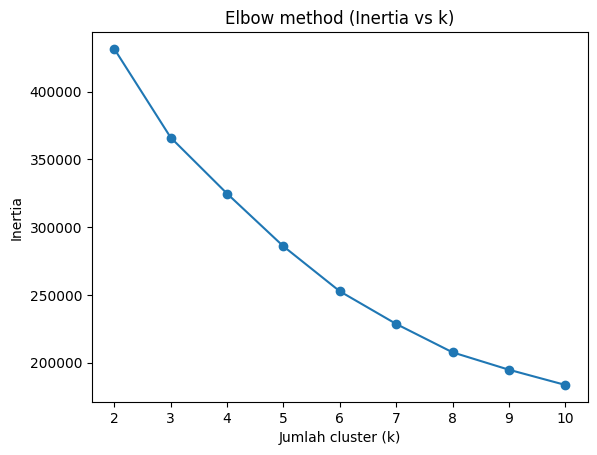

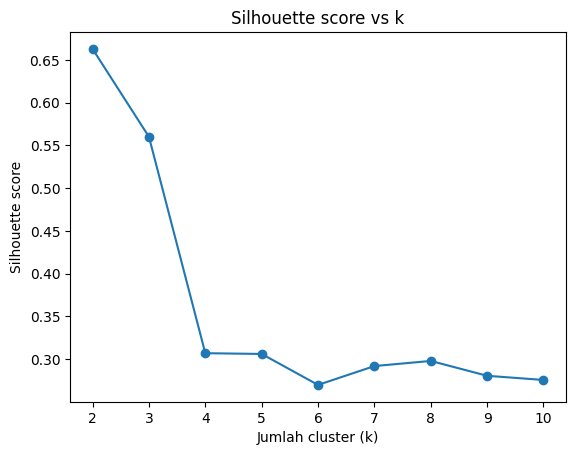

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Jumlah cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow method (Inertia vs k)")
plt.show()

plt.figure()
plt.plot(k_values, silhouettes, marker="o")
plt.xlabel("Jumlah cluster (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs k")
plt.show()


Grafik inertia menunjukkan bahwa nilai inertia terus menurun ketika jumlah cluster k bertambah. Namun penurunan mulai melandai setelah k = 2, sehingga terlihat seperti titik siku (elbow) di k = 2. Pada grafik silhouette, nilai silhouette tertinggi juga muncul pada k = 2. Artinya, pemisahan cluster paling baik terjadi ketika data dibagi menjadi dua kelompok. Berdasarkan dua pertimbangan ini, saya memilih k = 2 sebagai jumlah cluster yang digunakan pada model KMeans final.

# Pilih k terbaik secara otomatis (berdasarkan silhouette)

In [7]:
best_index = int(np.argmax(silhouettes))
best_k = k_values[best_index]

print("k terbaik (berdasarkan silhouette):", best_k)
print("Silhouette score terbaik:", silhouettes[best_index])


k terbaik (berdasarkan silhouette): 2
Silhouette score terbaik: 0.6629413850528425


# Train KMeans final dan tambahkan label cluster ke DataFrame

In [8]:
final_kmeans = KMeans(
    n_clusters=best_k,
    random_state=42,
    n_init=10
)

cluster_labels = final_kmeans.fit_predict(X_scaled)

df_clusters = df.copy()
df_clusters["cluster"] = cluster_labels

print("Jumlah anggota tiap cluster:")
print(df_clusters["cluster"].value_counts())


Jumlah anggota tiap cluster:
cluster
0    8577
1     373
Name: count, dtype: int64


# Ringkasan tiap cluster (rata-rata fitur penting)

In [9]:
# Pilih beberapa fitur penting untuk diringkas
important_cols = [
    "BALANCE",
    "BALANCE_FREQUENCY",
    "PURCHASES",
    "ONEOFF_PURCHASES",
    "INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE",
    "PURCHASES_FREQUENCY",
    "ONEOFF_PURCHASES_FREQUENCY",
    "PURCHASES_INSTALLMENTS_FREQUENCY",
    "CASH_ADVANCE_FREQUENCY",
    "CASH_ADVANCE_TRX",
    "PURCHASES_TRX",
    "CREDIT_LIMIT",
    "PAYMENTS",
    "MINIMUM_PAYMENTS",
    "PRC_FULL_PAYMENT",
    "TENURE"
]

# Pastikan kolom ada di dataset
important_cols = [c for c in important_cols if c in df_clusters.columns]

cluster_summary = df_clusters.groupby("cluster")[important_cols].mean().round(2)

print("Ringkasan rata-rata fitur per cluster:")
display(cluster_summary)


Ringkasan rata-rata fitur per cluster:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1446.27,0.87,731.14,405.15,326.30,945.97,0.48,0.19,0.35,0.14,3.19,12.08,4303.00,1465.41,641.43,0.15,11.50
1,4282.63,0.99,7259.28,4898.95,2360.34,1735.45,0.83,0.58,0.67,0.13,4.55,75.12,8896.25,7889.56,5813.88,0.22,11.92


# Visualisasi PCA 2D

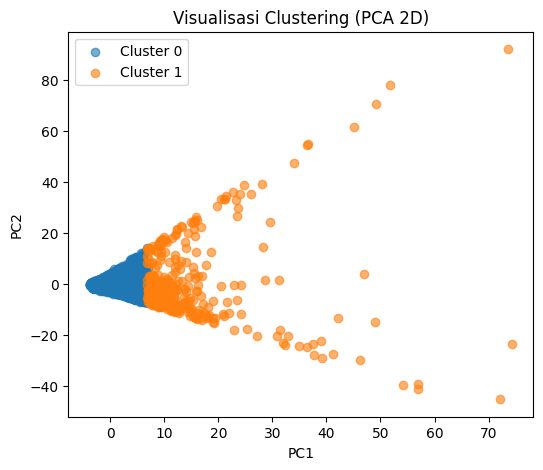

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "cluster": cluster_labels
})

plt.figure(figsize=(6, 5))
for c in sorted(df_plot["cluster"].unique()):
    subset = df_plot[df_plot["cluster"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {c}", alpha=0.6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi Clustering (PCA 2D)")
plt.legend()
plt.show()


# Interpretasi Hasil Clustering

Pada tugas ini saya melakukan clustering nasabah kartu kredit menggunakan algoritma K-Means. Setelah uji beberapa nilai k dengan inertia dan silhouette score, model terbaik membagi data menjadi dua cluster. Berikut ringkasan makna masing masing cluster berdasarkan nilai rata rata fitur utama.

**Cluster 0**

Cluster 0 berisi nasabah dengan penggunaan kartu yang cenderung rendah sampai sedang. Rata rata BALANCE sekitar 1.446 dan total PURCHASES sekitar 731, jauh lebih kecil dibanding cluster 1. Jumlah transaksi pembelian (PURCHASES_TRX) juga kecil. Mereka masih menggunakan kartu untuk belanja one-off dan cicilan, tetapi dengan nominal yang tidak besar. Penggunaan CASH_ADVANCE ada, tetapi jarang dan dengan nominal sedang. Limit kartu (CREDIT_LIMIT) relatif kecil, begitu juga dengan PAYMENTS dan MINIMUM_PAYMENTS. Proporsi bulan ketika nasabah membayar penuh (PRC_FULL_PAYMENT) juga rendah. Secara umum, cluster ini menggambarkan nasabah dengan profil pemakaian kartu rendah, risiko penggunaan moderat, dan kontribusi transaksi yang tidak terlalu besar.

**Cluster 1**

Cluster 1 berisi nasabah dengan aktivitas kartu yang jauh lebih tinggi. Rata rata BALANCE sekitar 4.283 dan total PURCHASES sekitar 7.259, jauh lebih tinggi dibanding cluster 0. Jumlah transaksi pembelian (PURCHASES_TRX) besar dan frekuensi pembelian tinggi. Nasabah di cluster ini sering melakukan pembelian one-off dengan nominal besar dan juga memanfaatkan cicilan. Penggunaan CASH_ADVANCE juga lebih tinggi dari cluster 0, meskipun frekuensi tidak dominan. LIMIT kartu rata rata lebih besar dan nilai PAYMENTS serta MINIMUM_PAYMENTS juga tinggi. Nilai PRC_FULL_PAYMENT sedikit lebih tinggi, yang menunjukkan sebagian nasabah masih mampu melakukan pembayaran penuh pada beberapa periode. Secara umum, cluster ini menggambarkan nasabah aktif dengan penggunaan kartu tinggi, limit besar, dan kontribusi transaksi yang signifikan.